In [1]:
# Requisitos para ejecutar este notebook
!pip install matplotlib seaborn scikit-learn pandas


In [2]:
# Configuración para mostrar gráficos en el notebook
%matplotlib inline


In [4]:
# ✅ Ajustar path para importar desde src/
import sys
from pathlib import Path

# Ir desde notebooks/ hacia la raíz del proyecto
project_root = Path().resolve().parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

In [5]:
from sklearn.exceptions import UndefinedMetricWarning
from src.utils import cargar_dataset, preprocesar_datos
import warnings
from src.modelos import (
    crear_modelo_random_forest,
    crear_modelo_logistic_regression,
    crear_modelo_svc,
)
from src.validacion import (
    obtener_kfold,
    obtener_loocv,
    obtener_stratified_kfold,
)
from src.evaluador import evaluar_metricas
from src.visualizador import (
    graficar_metricas_individuales,
    plot_metricas_comparativas
)

# Suprimir advertencias de métricas indefinidas
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)


In [6]:
# ================================
# Carga y preprocesamiento
# ================================
df = cargar_dataset()
X, y, _ = preprocesar_datos(df)


📥 Descargando dataset 'adult' desde OpenML...


/home/mparraf/.local/lib/python3.8/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


✅ Dataset cargado exitosamente.
📊 Tamaño del dataset: 48842 filas y 15 columnas.
🔍 Primeras filas del dataset:
    age  workclass    fnlwgt     education  education-num      marital-status  \
0  25.0    Private  226802.0          11th            7.0       Never-married   
1  38.0    Private   89814.0       HS-grad            9.0  Married-civ-spouse   
2  28.0  Local-gov  336951.0    Assoc-acdm           12.0  Married-civ-spouse   
3  44.0    Private  160323.0  Some-college           10.0  Married-civ-spouse   
4  18.0        NaN  103497.0  Some-college           10.0       Never-married   

          occupation relationship   race     sex  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male           0.0           0.0   
1    Farming-fishing      Husband  White    Male           0.0           0.0   
2    Protective-serv      Husband  White    Male           0.0           0.0   
3  Machine-op-inspct      Husband  Black    Male        7688.0           0.0   
4 

In [7]:
# ================================
# Modelos
# ================================
modelos = {
    "RandomForest": crear_modelo_random_forest(),
    "LogisticRegression": crear_modelo_logistic_regression(),
    # "SVC": crear_modelo_svc()
}


In [8]:
# ================================
# Técnicas de Validación Cruzada
# ================================
validaciones = {
    "KFold": obtener_kfold(n_splits=5),
    # "LeaveOneOut": obtener_loocv(X.values, y.values, n_samples=1000)[0],
    "StratifiedKFold": obtener_stratified_kfold(n_splits=5, random_state=42)
}



🔍 Evaluando RandomForest con KFold...


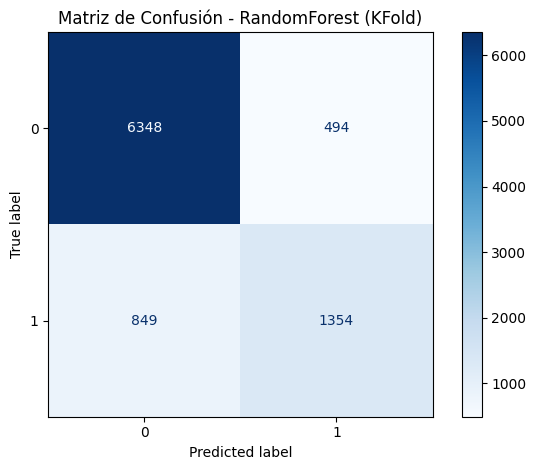

<Figure size 640x480 with 0 Axes>

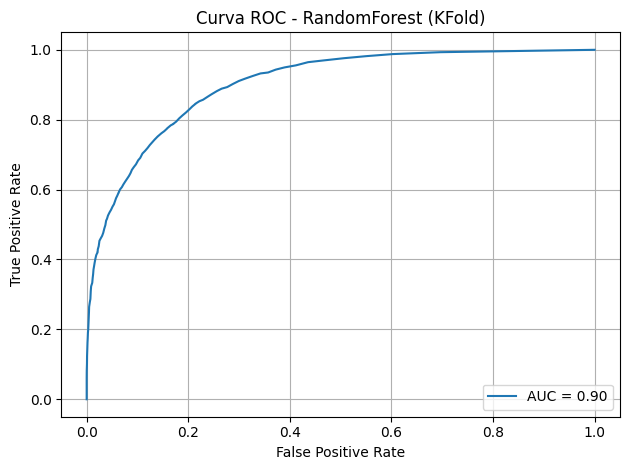

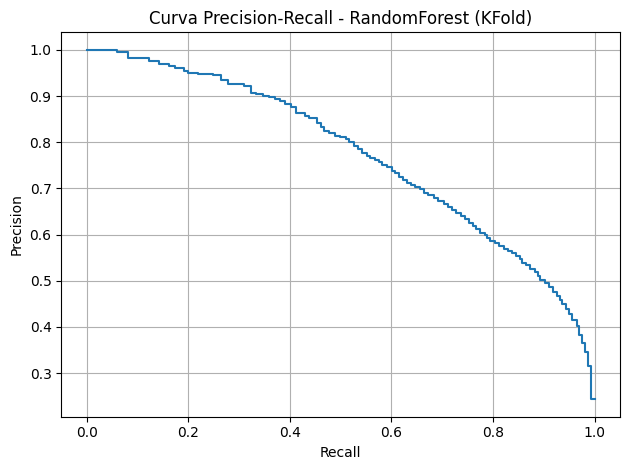


🔍 Evaluando RandomForest con StratifiedKFold...


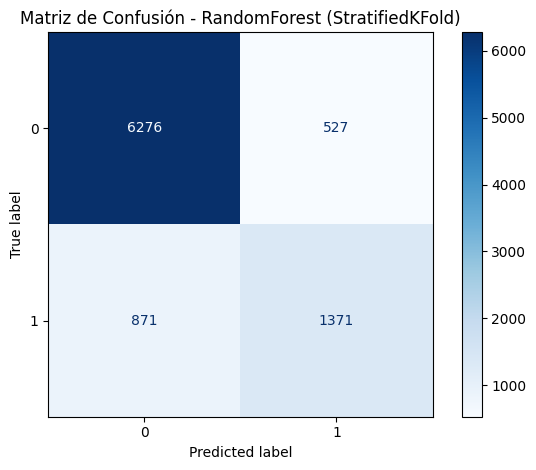

<Figure size 640x480 with 0 Axes>

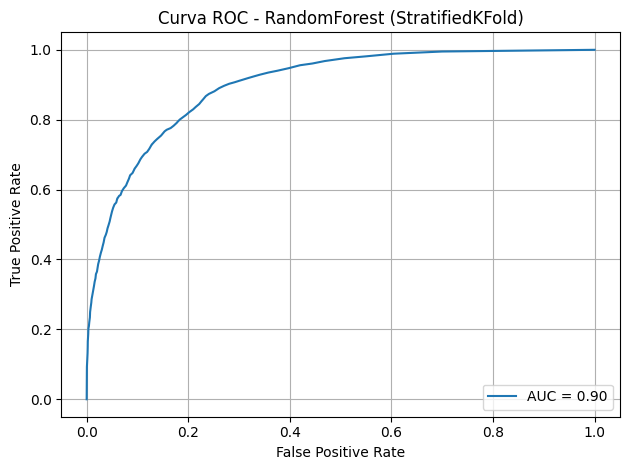

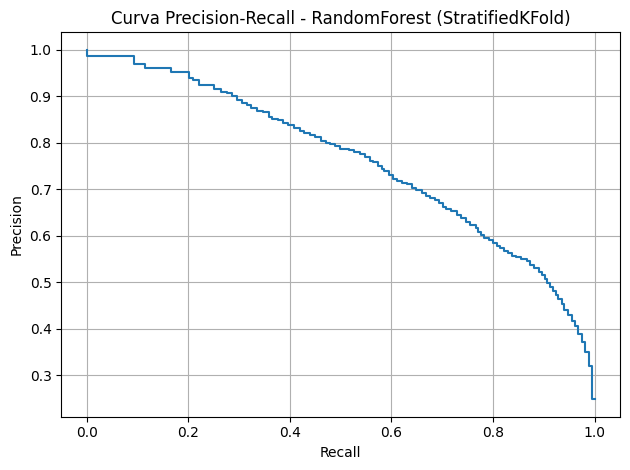


🔍 Evaluando LogisticRegression con KFold...


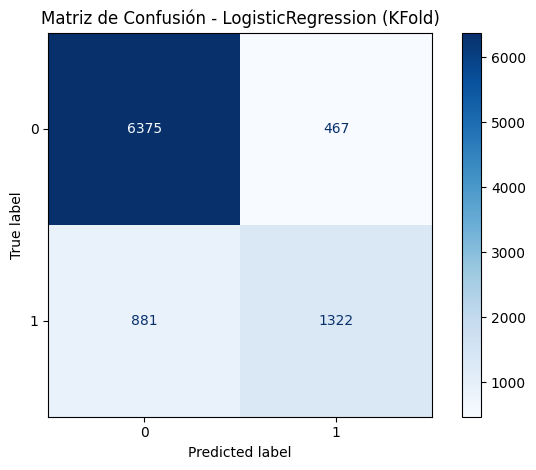

<Figure size 640x480 with 0 Axes>

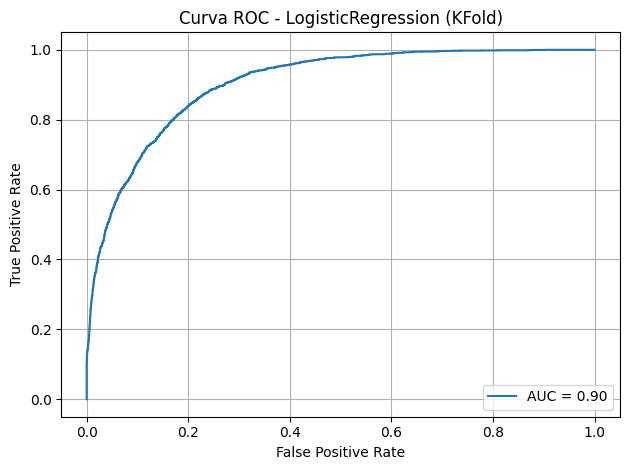

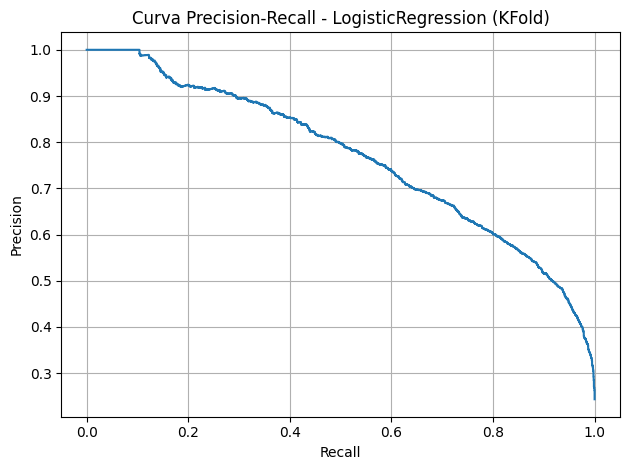


🔍 Evaluando LogisticRegression con StratifiedKFold...


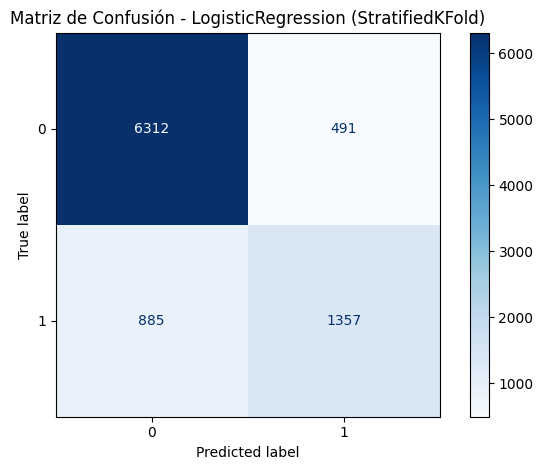

<Figure size 640x480 with 0 Axes>

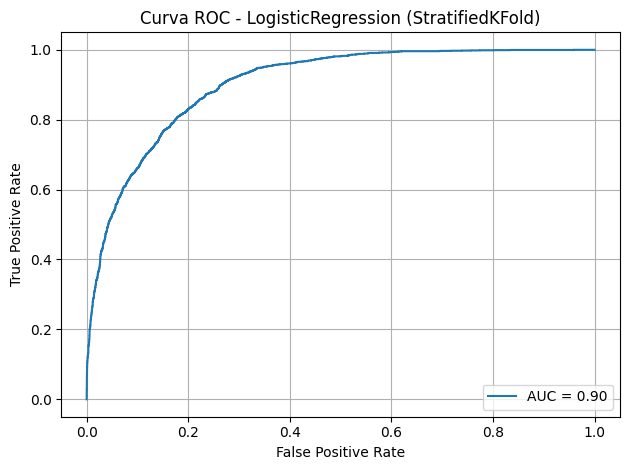

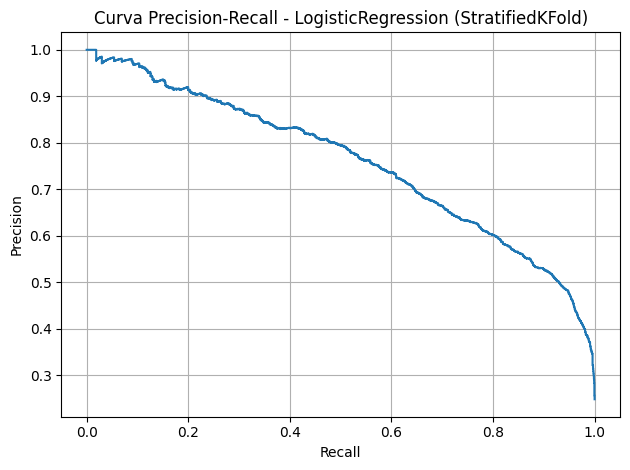

In [11]:
# ================================
# Evaluación + Gráficas Individuales
# ================================
import os


resultados = []
# Crear carpeta outputs si no existe
os.makedirs("outputs", exist_ok=True)
for nombre_modelo, modelo in modelos.items():
    for nombre_validacion, validador in validaciones.items():
        print(f"\n🔍 Evaluando {nombre_modelo} con {nombre_validacion}...")

        # Evaluación métrica
        metricas = evaluar_metricas(modelo, X.values, y.values, validador)
        metricas["modelo"] = nombre_modelo
        metricas["estrategia"] = nombre_validacion
        resultados.append(metricas)

        # Dividir manualmente para visualizar graficas (solo primera partición)
        train_idx, test_idx = next(iter(validador.split(X, y)))
        X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]

        # Gráficas individuales
        graficar_metricas_individuales(
            modelo, X_train, y_train, X_test, y_test,
            nombre_modelo=nombre_modelo, nombre_validacion=nombre_validacion
        )


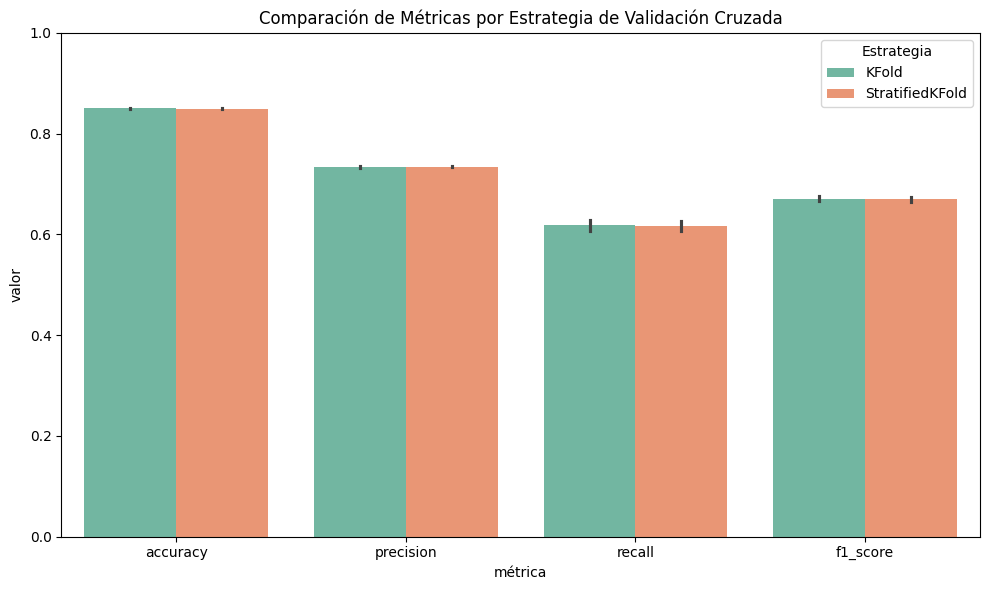


✅ Evaluación y visualización completadas.


In [12]:
# ================================
# Visualización Comparativa Final
# ================================
plot_metricas_comparativas(resultados)

print("\n✅ Evaluación y visualización completadas.")
